In [1]:
import os
import sys

__photoshop__ = os.path.join(sys.path[0], "../src")
sys.path.append(__photoshop__)

In [2]:
import numpy as np

from typing import Tuple
from PIL import Image
from matplotlib import pyplot as plt
from photoshop.core.dtype import Int, UInt8, Float32
from photoshop.ops.transform import rgb_to_luminosity, expand_as_rgba
from photoshop.blend.normal import normal_blend_if

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout

<IPython.core.display.Javascript object>


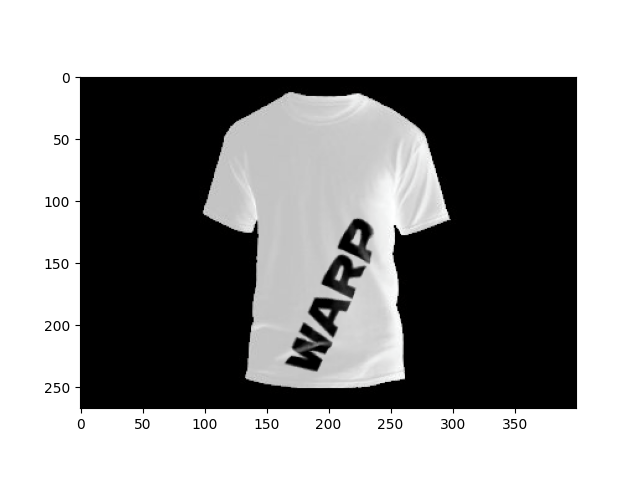

interactive(children=(IntRangeSlider(value=(0, 0), continuous_update=False, description='shadows', layout=Layo…

<function __main__.fn(shadows, highlights)>

In [5]:
%matplotlib notebook

fig, ax = plt.subplots(nrows=1, ncols=1)


layer = np.asarray(Image.open('/home/mike/Projects/photoshop/text_warp_black.png').convert('RGBA'), dtype=UInt8)  # noqa
displacement_map = np.asarray(Image.open('/home/mike/Projects/photoshop/map.png'), dtype=UInt8)  # noqa
underlying_layer = np.asarray(Image.open('/home/mike/Projects/photoshop/base_white.png').convert('RGBA'), dtype=UInt8)  # noqa


def draw(shadows, highlights):
    foreground, background = layer.copy(), underlying_layer.copy()
    img = normal_blend_if(foreground, background, shadows, highlights)  
    ax.imshow(img)


def fn(shadows, highlights):
    draw(shadows, highlights)
    

    
shadows_ = widgets.IntRangeSlider(
    value=[0, 0],
    min=0,
    max=255,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=Layout(width='50%')
)


highlights_ = widgets.IntRangeSlider(
    value=[255, 255],
    min=0,
    max=255,
    step=1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout=Layout(width='50%')
)


interact(fn, shadows=shadows_, highlights=highlights_)